In [2]:
import numpy as nm
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#import 
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
#Extracting Independent and dependent Variable
x= data.iloc[:, [2,3]].values
y= data.iloc[:, 4].values

In [7]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [8]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)

In [9]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
KNeighborsClassifier()

KNeighborsClassifier()

In [11]:
y_pred= classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [12]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print("confusion matrix",cm)

confusion matrix [[64  4]
 [ 3 29]]


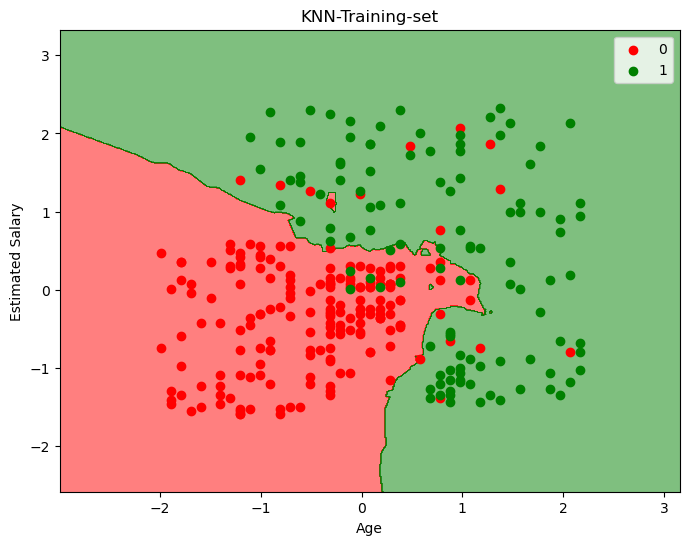

In [13]:
# Visualizing the Training set results
import numpy as np
from matplotlib.colors import ListedColormap

# Create a meshgrid to plot the decision boundary
X1, X2 = np.meshgrid(np.arange(start=X_train[:, 0].min() - 1, stop=X_train[:, 0].max() + 1,step=0.01),
                     np.arange(start=X_train[:, 1].min() - 1, stop=X_train[:, 1].max() + 1, step=0.01))

# Use the classifier to predict the class labels for each point in the meshgrid
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

# Create a color map for the plot
cmap = ListedColormap(('red','green'))

# Plot the training set data points
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, alpha=0.5, cmap=cmap)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='green', label='1')
plt.title("KNN-Training-set")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

In [ ]:
# Visualizing the Training set results
import numpy as np
from matplotlib.colors import ListedColormap

# Create a meshgrid to plot the decision boundary
X1, X2 = np.meshgrid(np.arange(start=X_test[:, 0].min() - 1, stop=X_test[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_test[:, 1].min() - 1, stop=X_test[:, 1].max() + 1, step=0.01))

# Use the classifier to predict the class labels for each point in the meshgrid
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

# Create a color map for the plot
cmap = ListedColormap(('red', 'green'))

# Plot the training set data points
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, alpha=0.5, cmap=cmap)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test== 0, 1], color='red', label='0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='green', label='1')
plt.title("KNN-Testing")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()